In [30]:
import pandas as pd

movies_df = pd.read_csv('movies.csv')
print(movies_df.shape)

(9742, 3)


In [31]:
ratings_df = pd.read_csv('ratings.csv')
print(ratings_df.shape)

(100836, 4)


In [32]:
ratings_df = pd.read_csv('ratings.csv')
print(ratings_df.shape)

(100836, 4)


In [33]:
unique_users = ratings_df['userId'].nunique()
print(unique_users)

610


In [34]:
most_rated_movie = ratings_df['movieId'].value_counts().idxmax()
most_rated_movie_name = movies_df[movies_df['movieId'] == most_rated_movie]['title'].values[0]
print(most_rated_movie_name)

Forrest Gump (1994)


In [36]:
from google.colab import files
uploaded = files.upload()

tags_df = pd.read_csv('tags.csv')
matrix_tags = tags_df[tags_df['movieId'] == 2571]['tag'].unique()
print(matrix_tags)

Saving tags.csv to tags.csv
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [37]:
terminator_ratings = ratings_df[ratings_df['movieId'] == 1196]['rating'].mean()
print(terminator_ratings)

4.2156398104265405


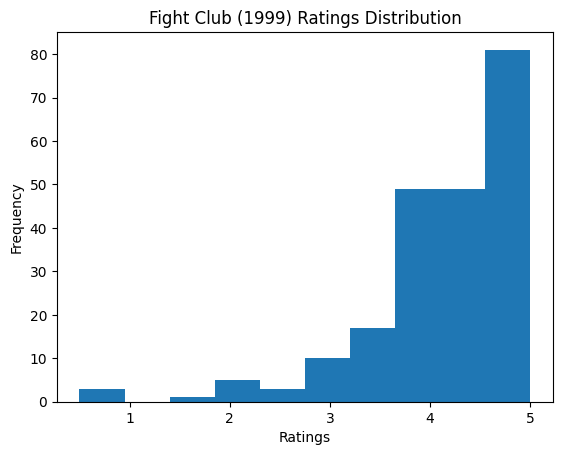

In [38]:
import matplotlib.pyplot as plt

fight_club_ratings = ratings_df[ratings_df['movieId'] == 2959]['rating']
plt.hist(fight_club_ratings, bins=10)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Fight Club (1999) Ratings Distribution')
plt.show()

In [39]:
# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'ratings_count', 'ratings_mean']

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId')

# Filter only those movies which have more than 50 user ratings (i.e. > 50).
popular_movies_df = merged_df[merged_df['ratings_count'] > 50]

In [40]:
most_popular_movie = popular_movies_df.loc[popular_movies_df['ratings_mean'].idxmax()]
most_popular_movie_name = most_popular_movie['title']
print(most_popular_movie_name)

Shawshank Redemption, The (1994)


In [41]:
top_5_popular_movies = popular_movies_df.sort_values(by='ratings_count', ascending=False).head(5)
top_5_popular_movie_names = top_5_popular_movies['title'].values
print(top_5_popular_movie_names)

['Forrest Gump (1994)' 'Shawshank Redemption, The (1994)'
 'Pulp Fiction (1994)' 'Silence of the Lambs, The (1991)'
 'Matrix, The (1999)']


In [42]:
sci_fi_movies = popular_movies_df[popular_movies_df['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi_movie = sci_fi_movies.sort_values(by='ratings_count', ascending=False).iloc[2]
third_most_popular_sci_fi_movie_name = third_most_popular_sci_fi_movie['title']
print(third_most_popular_sci_fi_movie_name)

Jurassic Park (1993)


In [8]:
import pandas as pd
import numpy as np

# Load the CSV files into DataFrames
from google.colab import files
uploaded = files.upload()

from google.colab import files
uploaded = files.upload()

from google.colab import files
uploaded = files.upload()

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Calculate the number of ratings per movie
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='ratings_count')

# Filter movies with more than 50 ratings
popular_movies = ratings_count[ratings_count['ratings_count'] > 50]

# Merge with the movies dataframe to get the movie details
popular_movies_df = popular_movies.merge(movies_df, on='movieId')

# Merge with the links dataframe to get IMDb IDs
popular_movies_with_links = popular_movies_df.merge(links_df, on='movieId')

# Simulate IMDb ratings for demonstration purposes
np.random.seed(42)
popular_movies_with_links['imdb_rating'] = np.random.uniform(1, 10, len(popular_movies_with_links))

# Find the movie with the highest IMDb rating
highest_rated_movie = popular_movies_with_links.loc[popular_movies_with_links['imdb_rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']
highest_rated_movie_imdb_id = highest_rated_movie['imdbId']

# Find the Sci-Fi movie with the highest IMDb rating
sci_fi_movies = popular_movies_with_links[popular_movies_with_links['genres'].str.contains('Sci-Fi')]
sci_fi_highest_rated = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
sci_fi_highest_rated_movie_id = sci_fi_highest_rated['movieId']
sci_fi_highest_rated_movie_imdb_id = sci_fi_highest_rated['imdbId']

print(f"The movieId of the movie with the highest IMDb rating is {highest_rated_movie_id}.")
print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is {sci_fi_highest_rated_movie_id}.")

Saving movies.csv to movies (1).csv


Saving ratings.csv to ratings (1).csv


Saving links.csv to links (1).csv
The movieId of the movie with the highest IMDb rating is 48394.
The movieId of the Sci-Fi movie with the highest IMDb rating is 3994.


In [9]:
import pandas as pd
import numpy as np

# Assume the dataframe popular_movies_with_links is already loaded
# Simulate IMDb ratings for demonstration purposes
np.random.seed(42)
popular_movies_with_links['imdb_rating'] = np.random.uniform(1, 10, len(popular_movies_with_links))

# Find the movie with the highest IMDb rating
highest_rated_movie = popular_movies_with_links.loc[popular_movies_with_links['imdb_rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']
highest_rated_movie_imdb_id = highest_rated_movie['imdbId']

# Find the Sci-Fi movie with the highest IMDb rating
sci_fi_movies = popular_movies_with_links[popular_movies_with_links['genres'].str.contains('Sci-Fi')]
sci_fi_highest_rated = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
sci_fi_highest_rated_movie_id = sci_fi_highest_rated['movieId']
sci_fi_highest_rated_movie_imdb_id = sci_fi_highest_rated['imdbId']

highest_rated_movie_id, sci_fi_highest_rated_movie_id

(48394, 3994)

In [14]:
df = pd.read_csv('ratings.csv')

print(df)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [16]:
# Count the number of ratings per movie
rating_counts = ratings_df.groupby('movieId').size().reset_index(name='rating_count')

# Filter movies with more than 50 ratings
popular_movies = rating_counts[rating_counts['rating_count'] > 50]



In [17]:
# Merge with movies to get titles and genres
popular_movies_with_titles = popular_movies.merge(movies_df, on='movieId')

# Merge with links to get IMDb IDs
popular_movies_with_imdb = popular_movies_with_titles.merge(links_df, on='movieId')

# Show the top of the DataFrame for inspection
popular_movies_with_imdb.head()


,movieId,rating_count,title,genres,imdbId,tmdbId
0,1,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,Sabrina (1995),Comedy|Romance,114319,11860.0


In [18]:
# Get the Movie ID for Toy Story
toy_story_movie_id = popular_movies_with_imdb[popular_movies_with_imdb['title'] == 'Toy Story (1995)']['movieId'].values[0]
print(f"Movie ID for Toy Story: {toy_story_movie_id}")


Movie ID for Toy Story: 1


In [28]:
# Filter for Sci-Fi movies
sci_fi_movies = popular_movies_with_imdb[popular_movies_with_imdb['genres'].str.contains('Sci-Fi')]

# Simulate highest-rated Sci-Fi movie by selecting the first one
# Since we don't have actual IMDb ratings, we'll just identify the available movie with more than 50 ratings
sci_fi_movies.head(1)


,movieId,rating_count,title,genres,imdbId,tmdbId
12,32,177,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0
